## RF with 3 categories: No matter, NS but no Remnant, NS and a remnant

# Notice:
The features used for training and testing are m1, m2, chi1, chi2 recovered, and SNR. It says otherwise by inheritance of previous code.

In [2]:
import classyRF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

C:\Users\marin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import importlib
importlib.reload(classyRF)

<module 'classyRF' from 'C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\classyRF.py'>

In [10]:
pathREM = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\RM_dataset_NOPUBLIC\\"
pathBNS = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\NS_dataset_NOPUBLIC\\"
pathClassy = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\"
pathData = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\allEOS\\"
pathTrees = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\500trees\\"

In [4]:
i_m1r=1; i_m2r=2; i_x1r=3; i_x2r=4; i_mcr=5; i_qr=6; i_Rr=7;
i_snr=8;
recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_mcr, i_qr, i_Rr, i_snr]
independent_recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_snr]

### Load the data and convert to the three categories

In [20]:
random.seed(42)
RF = classyRF.ClassificationRF()
RF.load_original_dataset(pathData, fname_x='original_data_APR4_EPP_s300_f0d7.csv')

N=int(len(RF.data_train_all));print(N, "total events")
test_N=int(np.floor(0.3*N)); print(test_N, "events for testing")

#indexes_test=random.sample(list(np.arange(0,N)), test_N);
#all_indexes=(np.arange(0,N)).tolist()
#indexes_train=list(set(all_indexes) - set(indexes_test))

indexes_test=list(np.arange(0,test_N));
all_indexes=(np.arange(0,N)).tolist()
indexes_train=list(set(all_indexes) - set(indexes_test))



labelREM=RF.data_train_all[indexes_train,-1]
labelBNS=RF.data_train_all[indexes_train,-2]
RF.labels_train = labelREM+labelBNS

RF.data_test_all=RF.data_train_all[indexes_test,0:-2]
labelREM=RF.data_train_all[indexes_test,-1]
labelBNS=RF.data_train_all[indexes_test,-2]
RF.labels_test = labelREM+labelBNS

#RF.data_train_all=RF.data_train_all[indexes_train,0:-2]

loaded
198961 total events
59688 events for testing


(array([68770., 90530., 39661.]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <a list of 3 Patch objects>)

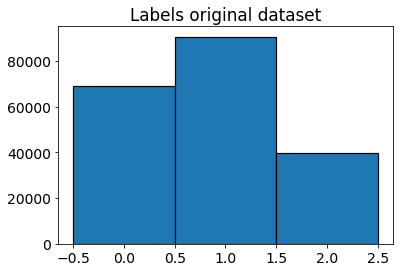

In [21]:
all_labels=RF.data_train_all[:,-1]+RF.data_train_all[:,-2]
bins = np.arange(4) - 0.5
plt.title("Labels original dataset")
plt.hist(all_labels,bins=bins,label="training set",  edgecolor='black', linewidth=1.2)

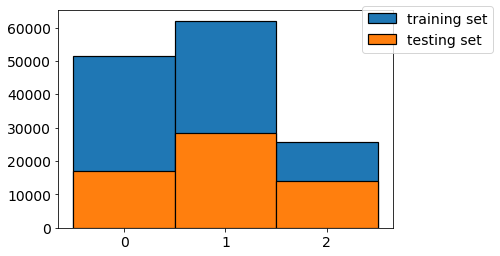

139273
Train:
label 0:  0.3705743396063846
label 1:  0.4454345063292957
label 2:  0.1839911540643197
59688
Test:
label 0:  0.28747822007773755
label 1:  0.4773656346334271
label 2:  0.23515614528883527


In [22]:
bins = np.arange(4) - 0.5
plt.hist(RF.labels_train,bins=bins,label="training set",  edgecolor='black', linewidth=1.2)
plt.hist(RF.labels_test,bins=bins, label="testing set", edgecolor='black', linewidth=1.2)
plt.xticks([0,1,2])
plt.legend(bbox_to_anchor=(1.32, 1.05))
#plt.savefig("dataProportion.png",dpi=200,bbox_inches='tight')
plt.show()

N=len(RF.labels_train);print(N)
print("Train:");print("label 0: ",np.count_nonzero(RF.labels_train==0)/N);
print("label 1: ",np.count_nonzero(RF.labels_train==1)/N)
print("label 2: ",np.count_nonzero(RF.labels_train==2)/N)

N=len(RF.labels_test);print(N)
print("Test:");print("label 0: ",np.count_nonzero(RF.labels_test==0)/N);
print("label 1: ",np.count_nonzero(RF.labels_test==1)/N)
print("label 2: ",np.count_nonzero(RF.labels_test==2)/N)

# Do it all loop

In [23]:
EOS = ["APR4_EPP", "BHF_BBB2", "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1_PP", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLy", "SLY2", "SLY9", "SLY230A"]

random.seed(42)
plt.rcParams["font.size"]=14

In [6]:
def hist_ROC_NS(algo, figname):
    probs=algo.model.predict_proba(algo.data_test)
    pred=probs[:,1]+probs[:,2]
    truelabel=algo.labels_test
    index_events_has=(np.where((truelabel == 1) | (truelabel == 2)))
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where(truelabel==0)
    p_events_nohas=pred[index_events_nohas]
    
    
    allprob = algo.model.predict_proba(algo.data_test)
    v_prob_NS = allprob[:,1] + allprob[:,2]
    events_have_NS = np.where((RF.labels_test==1) | (RF.labels_test==2))[0]
    N = len(events_have_NS)
    M = len(algo.labels_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_NS>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_NS:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        i = i + 1
    
    
    
    f, (ax) = plt.subplots(1,2,figsize=(10, 5),constrained_layout=True)
    
    ax[0].hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label='No NS')
    ax[0].hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label='Has NS')
    ax[0].set_yscale('log')
    ax[0].set_yticks([1e2,1e3,1e4,1e5])
    ax[0].set_xticks([0,0.2,0.4,0.6,0.8,1])
    ax[0].set_ylim([4.5e1,1.9e5])
    ax[0].set_xlabel('P(HasNS)')
    ax[0].axvline(x=0.5,color='black',ls='--')
    ax[0].grid(ls='--')
    handles, labels = ax[0].get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)
    
    
    sc=ax[1].scatter(FP, TP, c=threshold, cmap='viridis')
    f.colorbar(sc,ax=ax[1], label="Threshold", aspect=50)
    ax[1].set_xlabel("False Positive")
    ax[1].set_ylabel("True Positive")
    ax[1].grid(ls='--')
    ax[1].set_ylim([0.82,1.02])
    ax[1].set_xlim([0,0.2])
    ax[1].set_yticks(np.linspace(0.825,1,8))
    
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return


def hist_ROC_REM(algo, figname):
    probs=algo.model.predict_proba(algo.data_test)
    pred=probs[:,2]
    truelabel=algo.labels_test
    index_events_has=np.where(truelabel == 2)
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where((truelabel==0) | (truelabel==1))
    p_events_nohas=pred[index_events_nohas]
    
    
    allprob = algo.model.predict_proba(algo.data_test)
    v_prob_REM = allprob[:,2]
    events_have_REM = np.where(RF.labels_test==2)[0]
    N = len(events_have_REM)
    M = len(algo.labels_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_REM>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_REM:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        i = i + 1
    
    
    
    f, (ax) = plt.subplots(1,2,figsize=(10, 5),constrained_layout=True)
    
    ax[0].hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label='No Remnant')
    ax[0].hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label='Has Remnant')
    ax[0].set_yscale('log')
    ax[0].set_yticks([1e2,1e3,1e4,1e5])
    ax[0].set_xticks([0,0.2,0.4,0.6,0.8,1])
    ax[0].set_ylim([4.5e1,1.9e5])
    ax[0].set_xlabel('P(HasRemnant)')
    ax[0].axvline(x=0.5,color='black',ls='--')
    ax[0].grid(ls='--')
    handles, labels = ax[0].get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)
    
    
    sc=ax[1].scatter(FP, TP, c=threshold, cmap='viridis')
    f.colorbar(sc,ax=ax[1], label="Threshold", aspect=50)
    ax[1].set_xlabel("False Positive")
    ax[1].set_ylabel("True Positive")
    ax[1].grid(ls='--')
    ax[1].set_ylim([0.82,1.02])
    ax[1].set_xlim([0,0.2])
    ax[1].set_yticks(np.linspace(0.825,1,8))
    
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return


In [12]:
from sklearn.ensemble import RandomForestClassifier
import time
def hyperparam(obj,trees=[10,30,50,80,100,300], info=['entropy'], features=['sqrt'],depths=[15,25,35,45,None]):
    best_score = -1
    scores=[]

    for tree in trees:
        for criteria in info:
            for feature in features:
                for depth in depths:
                    if obj.verbose:
                        print("Doing ",tree, " trees, criterion ",criteria," and ",feature," features") 
                    clf = RandomForestClassifier(n_estimators=tree, criterion=criteria, max_features=feature, max_depth=depth,random_state=42) 
                    t0=time.perf_counter()
                    clf.fit(obj.data_train, np.ravel(obj.labels_train))
                    total_time=time.perf_counter()-t0
                    score = clf.score(obj.data_test,obj.labels_test)
                    print("Training: ",tree, " trees, criterion ",criteria," and ",feature," features. Depth ",depth,"Score: ",score,". Time elapsed: {:.3f}".format(total_time), "s.")
                    scores.append(score)
                    if score>best_score:
                        best_score = score
                        config=[tree,criteria,feature,depth]

    #print("Standard deviation of score during crossvalidation: ",np.std(scores),". Mean: ",np.mean(scores))

    print("Higher score: ",best_score,". Optimum forest found: ",config[0]," trees, ",config[1], " criteria and ",config[2]," max features", config[3], " depth")
    return config

In [24]:
score_list=[]

for eos in EOS:
    print("-------------------------------")
    print("Doing", eos)
    RF = classyRF.ClassificationRF()
    RF.load_original_dataset(pathData, fname_x='original_data_'+eos+'_s300_f0d7.csv')
    
    N=int(len(RF.data_train_all));print(N, "total events")
    test_N=int(np.floor(0.3*N)); print(test_N, "events for testing")
    indexes_test=list(np.arange(0,test_N));
    all_indexes=(np.arange(0,N)).tolist()
    indexes_train=list(set(all_indexes) - set(indexes_test))

    labelREM=RF.data_train_all[indexes_train,-1]
    labelBNS=RF.data_train_all[indexes_train,-2]
    RF.labels_train = labelREM+labelBNS

    RF.data_test_all=RF.data_train_all[indexes_test,0:-2]
    labelREM=RF.data_train_all[indexes_test,-1]
    labelBNS=RF.data_train_all[indexes_test,-2]
    RF.labels_test = labelREM+labelBNS

    RF.data_train_all=RF.data_train_all[indexes_train,0:-2]
    
    RF.subset_features(independent_recovered_index)
    
    config=hyperparam(RF)
    RF.train(trees=config[0], criterion=config[1], max_features=config[2], max_depth=config[3])
    
    RF.saveModel(pathClassy, eos)
    
    score_list.append(RF.model.score(RF.data_test,RF.labels_test))
    
    #RF.save_plots = True
    #hist_ROC_NS(RF,eos+"_hist_ROC_NS")
    #hist_ROC_REM(RF,eos+"_hist_ROC_REM")

print(score_list)

-------------------------------
Doing APR4_EPP
loaded
198961 total events
59688 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9672966090336416 . Time elapsed: 2.710 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9653364160300227 . Time elapsed: 2.894 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9646495107894384 . Time elapsed: 2.885 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9644317115668141 . Time elapsed: 2.831 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9644317115668141 . Time elapsed: 2.976 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9678997453424474 . Time elapsed: 8.623 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  25 

loaded
195764 total events
58729 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9609051746156073 . Time elapsed: 2.884 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9580445776362615 . Time elapsed: 2.897 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9571251000357575 . Time elapsed: 2.980 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9570059084949514 . Time elapsed: 2.907 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9570059084949514 . Time elapsed: 2.918 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9613649134158593 . Time elapsed: 8.726 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9592875751332391 . Time elapsed: 9.01

Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9654077798177731 . Time elapsed: 2.712 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9645326790095918 . Time elapsed: 2.727 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9633658779320167 . Time elapsed: 2.911 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9636575782014104 . Time elapsed: 3.281 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9636575782014104 . Time elapsed: 3.033 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9666603750922288 . Time elapsed: 8.500 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9658367508021758 . Time elapsed: 8.834 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9654249386571492 . Time elapsed: 8.704 s

Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9619645373799613 . Time elapsed: 3.018 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9607190849201928 . Time elapsed: 3.432 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9607354724525581 . Time elapsed: 3.026 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9607354724525581 . Time elapsed: 3.182 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9656189570974403 . Time elapsed: 9.395 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9634558028252106 . Time elapsed: 9.666 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9627019763364033 . Time elapsed: 9.550 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9631116646455377 . Time elapsed: 9.373 s

Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9603257841434237 . Time elapsed: 2.980 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9605388220641736 . Time elapsed: 2.996 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9605388220641736 . Time elapsed: 3.038 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9650945560617482 . Time elapsed: 8.986 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9626692012716725 . Time elapsed: 9.279 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9627675264658647 . Time elapsed: 9.640 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9627347514011341 . Time elapsed: 9.541 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9627347514011341 . Time elapsed: 9.174

Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9600228345002435 . Time elapsed: 3.036 s.
Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9600228345002435 . Time elapsed: 3.062 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9638341812320556 . Time elapsed: 8.643 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9621551738612133 . Time elapsed: 9.132 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9624573951879649 . Time elapsed: 9.123 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9622055440823385 . Time elapsed: 9.139 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9622055440823385 . Time elapsed: 9.102 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.964086032337682 . Time elapsed: 14.704

Training:  10  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.959191533540976 . Time elapsed: 2.660 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9621722093841053 . Time elapsed: 7.697 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9598278575973743 . Time elapsed: 8.067 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9600790381459526 . Time elapsed: 8.115 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9599785659265213 . Time elapsed: 8.117 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9599785659265213 . Time elapsed: 8.102 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9624233899326836 . Time elapsed: 12.801 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9600120566663317 . Time elapsed: 13.66

Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9659060492505354 . Time elapsed: 7.717 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9642331370449678 . Time elapsed: 8.029 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9634970556745182 . Time elapsed: 7.886 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9631792023554604 . Time elapsed: 7.911 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9630620985010707 . Time elapsed: 7.904 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9655045503211992 . Time elapsed: 12.849 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9642164079229122 . Time elapsed: 13.482 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9640491167023555 . Time elapsed: 13.72

Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9636005738497981 . Time elapsed: 8.018 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9631168051246122 . Time elapsed: 8.060 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9633503486471158 . Time elapsed: 8.095 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9633503486471158 . Time elapsed: 8.070 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.965735828912688 . Time elapsed: 12.911 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9637673906515865 . Time elapsed: 13.377 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9635338471290829 . Time elapsed: 13.505 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9634337570480098 . Time elapsed: 13.40

Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9637912125574063 . Time elapsed: 7.847 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9634484885872918 . Time elapsed: 7.846 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9634656247857976 . Time elapsed: 7.918 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9659846459661389 . Time elapsed: 12.528 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9640996641305093 . Time elapsed: 13.223 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9638768935499349 . Time elapsed: 13.141 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9637912125574063 . Time elapsed: 13.113 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9637912125574063 . Time elapsed: 1

Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9641128415903802 . Time elapsed: 7.921 s.
Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9641128415903802 . Time elapsed: 7.978 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9670680548243007 . Time elapsed: 12.740 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9650809286842508 . Time elapsed: 13.157 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.964673313065779 . Time elapsed: 13.300 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9649110888432209 . Time elapsed: 13.269 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9649110888432209 . Time elapsed: 13.259 s.
Training:  80  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9672209106812276 . Time elapsed: 1

Training:  30  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.964683230023477 . Time elapsed: 8.264 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9668789163443512 . Time elapsed: 13.054 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9651561470772038 . Time elapsed: 13.878 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  35 Score:  0.9648859087607884 . Time elapsed: 13.927 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  45 Score:  0.9648521289712365 . Time elapsed: 14.226 s.
Training:  50  trees, criterion  entropy  and  sqrt  features. Depth  None Score:  0.9648521289712365 . Time elapsed: 14.111 s.
Training:  80  trees, criterion  entropy  and  sqrt  features. Depth  15 Score:  0.9667606870809194 . Time elapsed: 20.658 s.
Training:  80  trees, criterion  entropy  and  sqrt  features. Depth  25 Score:  0.9653419359197393 . Time elapsed: 

# ----- Test code for the loop -----

# Train

In [15]:
#Doing: 500  trees, entropy criteria and  sqrt  max_features
RF.subset_features(independent_recovered_index)
RF.model=RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='sqrt',max_depth=15,random_state=42)
RF.model.fit(RF.data_train, np.ravel(RF.labels_train))
RF.saveModel(pathClassy,'APR4_EPP')

Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


In [85]:
RF.model.score(RF.data_test,RF.labels_test)

0.9645824956440155

# Load trained model

In [7]:
#Optimum forest found:  500  trees, entropy criteria and  sqrt  max_features
RF.loadModel(pathClassy, 'forest_3cat')
RF.subset_features(independent_recovered_index)

loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\forest_3cat.joblib
Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr


## Measure evaluation time

In [30]:
import time

In [36]:
event=[30,22,0.1,-0.6,11]
event=np.asarray(event)
event=event.reshape(1, -1)
times=[]
for k in range(0,23):
    t0=time.perf_counter()
    RF.model.predict(event)
    total_time=time.perf_counter()-t0
    times.append(total_time)
print("Mean time evaluating", np.mean(times), np.std(times),np.max(times),np.min(times), np.sum(times))

Mean time evaluating 0.02062150434782579 0.0025249147010092134 0.030127100000001406 0.018762899999998695 0.47429459999999324


In [35]:
events=RF.data_test[0:500]
t0=time.perf_counter()
RF.model.predict(events)
total_time=time.perf_counter()-t0
print(total_time, total_time/500)

0.08074080000000095 0.00016148160000000188


In [ ]:
t0=time.perf_counter()
RFrem.model.predict(RFrem.data_test)
total_time=time.perf_counter()-t0
print(total_time, total_time/len(RFrem.data_test))

## Line mass remnant = 0

In [37]:
outseq=np.loadtxt("outseq.d")
radius=outseq[:,0]
masses=outseq[:,2]

In [38]:
def Risco(chi1):
    z1=1+(1-chi1**2)**(1.0/3)*((1+chi1)**(1.0/3)+(1-chi1)**(1.0/3))
    z2=np.sqrt(3*chi1**2+z1**2)
    return 3+z2-np.sign(chi1)*np.sqrt((3-z1)*(3+z1+2*z2))

In [39]:
from scipy.optimize import fsolve
from scipy import interpolate

In [40]:
f = interpolate.interp1d(masses, radius,bounds_error=False, fill_value='extrapolate')
def R_km(m2):
    return f(m2)

In [41]:
alpha=0.406; beta=0.139; gamma=0.255; delta=1.761
factor=1.98847e30/(1e5*0.001)*(6.67408e-8/898755178736817640000.0)

def Mrem(m1, Risco):
    return lambda m2 : (alpha*(1-2*factor*m2/R_km(m2))/(m1/m2/(1+m1/m2)**2)**(1.0/3)-beta*Risco*factor*m2/R_km(m2)/((m1/m2/(1+m1/m2)**2))+gamma)**delta

def Mrem_check(m1,m2,Risco):
    return np.max(alpha*(1-2*factor*m2/R_km(m2))/(m1/m2/(1+m1/m2)**2)**(1.0/3)-beta*Risco*factor*m2/R_km(m2)/((m1/m2/(1+m1/m2)**2))+gamma,0)**delta

In [42]:
def calculate_red_line(chi1):
    m1_values=np.linspace(2.84,50,100); m2_values=[]
    for m1 in m1_values:
        m2_values.append(fsolve(Mrem(m1,Risco(chi1)), np.min(masses)))
        #m2_values.append((least_squares(Mrem(m1,Risco(chi1)), 1.2, bounds = (np.min(masses), np.max(masses)))).x[0])
    return [m1_values.tolist(), m2_values]

## Parameter sweep (fig4, fig6)

In [52]:
def generateMasses_limited(N):
    maxm1=50
    minm1=1
    maxm2=15
    minm2=1
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    events=[]
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                events.append([m1[i],m2[j]])
    return events

def probLabelDensePlot(algo, masses, chi1, chi2, snr, label, figname="sweep"):
    N=len(masses)    
    Nfigures=len(chi1)
    
    f, (ax) = plt.subplots(Nfigures,1,figsize=(10, 3*Nfigures),constrained_layout=True)
    for i in range (0,Nfigures):
        X=[]
        m1=np.zeros(N)
        m2=np.zeros(N)
        for k in range(0,N):
            X.append([masses[k][0],masses[k][1],chi1[i],chi2[i],snr[i]])
            m1[k]=masses[k][0]
            m2[k]=masses[k][1]
        proba_dense   = algo.model.predict_proba(X)
        
        ax[i].tick_params(axis='y',labelsize=13)
        ax[i].tick_params(axis='x',labelsize=13)        
        
        if label == 'NS':
            proba_dense1d = proba_dense[:,1]+proba_dense[:,2]
            sc=ax[i].scatter(m1,m2, c=proba_dense1d, vmin=0, vmax=1, s=40, cmap='viridis')
            ax[i].set_yticks([1.0,3.0,10.0])
            ax[i].set_xticks([10.0,30.0,50.0])
            ax[i].axhline(y = 3, color = 'r', linestyle = '-')

        if label == 'REM':
            proba_dense1d = proba_dense[:,2]
            ax[i].set_xticks([2.83,10.0,30.0,50.0])
            ax[i].set_yticks([1.0,2.83,10.0])
            sc=ax[i].scatter(m1,m2, c=proba_dense1d, vmin=0, vmax=1, s=40, cmap='viridis')
            redline=calculate_red_line(chi1[i])
            redline[1].insert(0,2.83)
            redline[1].insert(0,2.83)
            redline[0].insert(0,2.83)
            redline[0].insert(0,1)
            ax[i].plot(redline[0],redline[1], color = 'r', linestyle = '-')
            
        ax[i].set_title(r'$\chi^z_1$ = '+str(chi1[i])+', $\chi^z_2$ = '+str(chi2[i])+', SNR='+str(snr[i]),fontsize=18)
        if i==Nfigures-1:
            ax[i].set_xlabel(r"$m_1[M_\odot]$", fontsize=18)
        ax[i].set_xlim([1,50])
        ax[i].set_ylim([1,15])
        ax[i].set_ylabel(r"$m_2[M_\odot]$", fontsize=18)
    
    f.colorbar(sc, ax=ax, shrink=0.8)
    
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return

In [64]:
M=generateMasses_limited(1000);

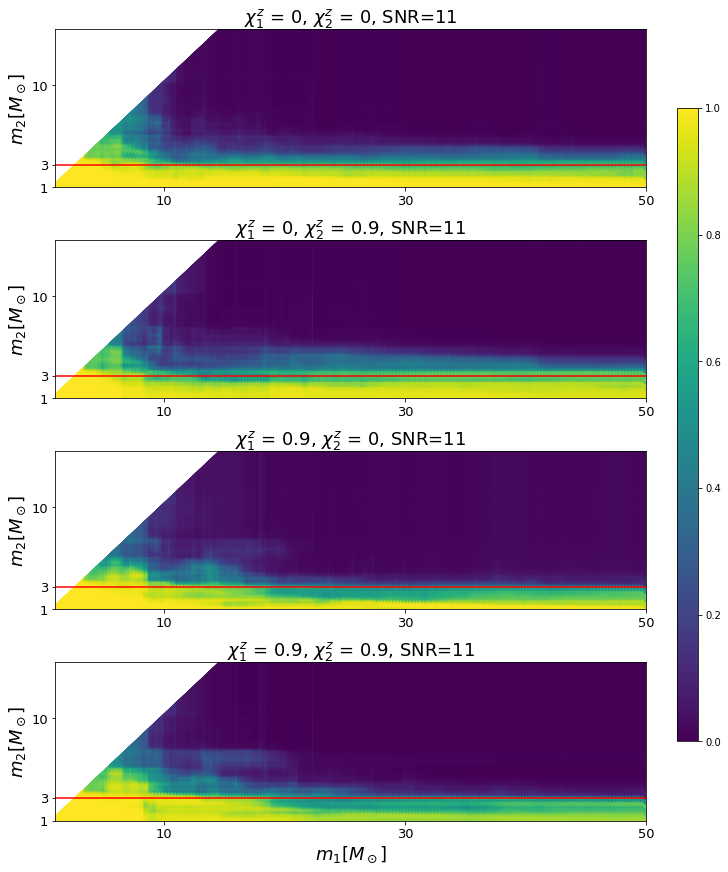

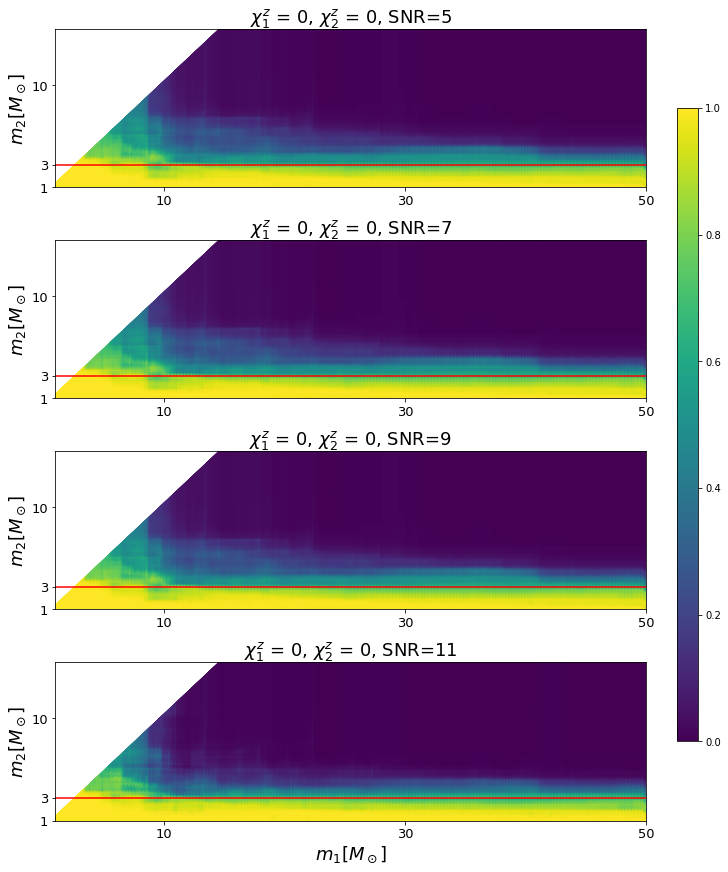

In [65]:
RF.save_plots=True
probLabelDensePlot(RF,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'NS',"3cat_fig4bns")
probLabelDensePlot(RF,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'NS',"3cat_fig6bns")
RF.save_plots=False

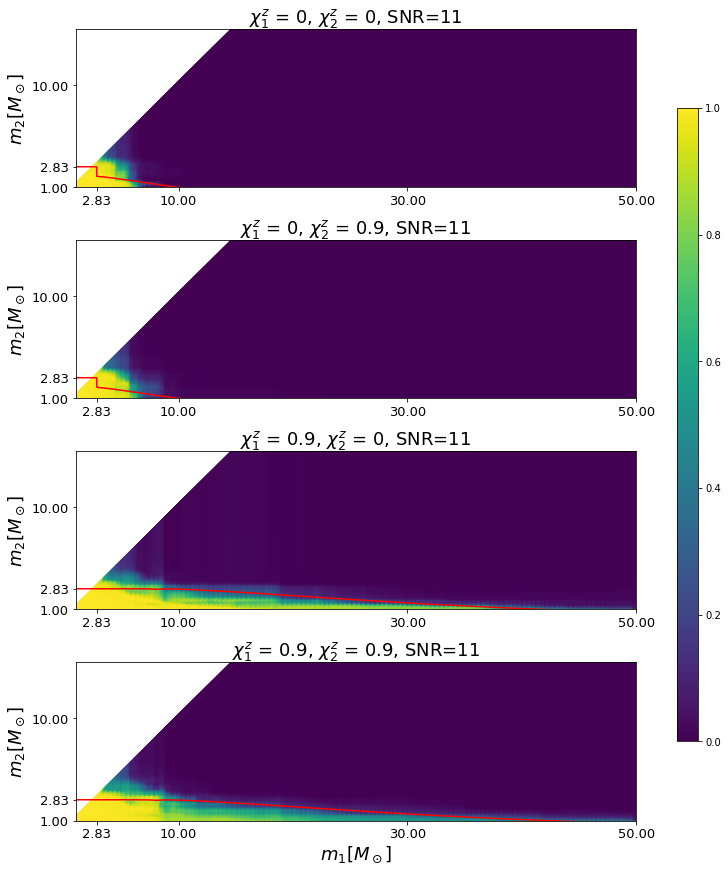

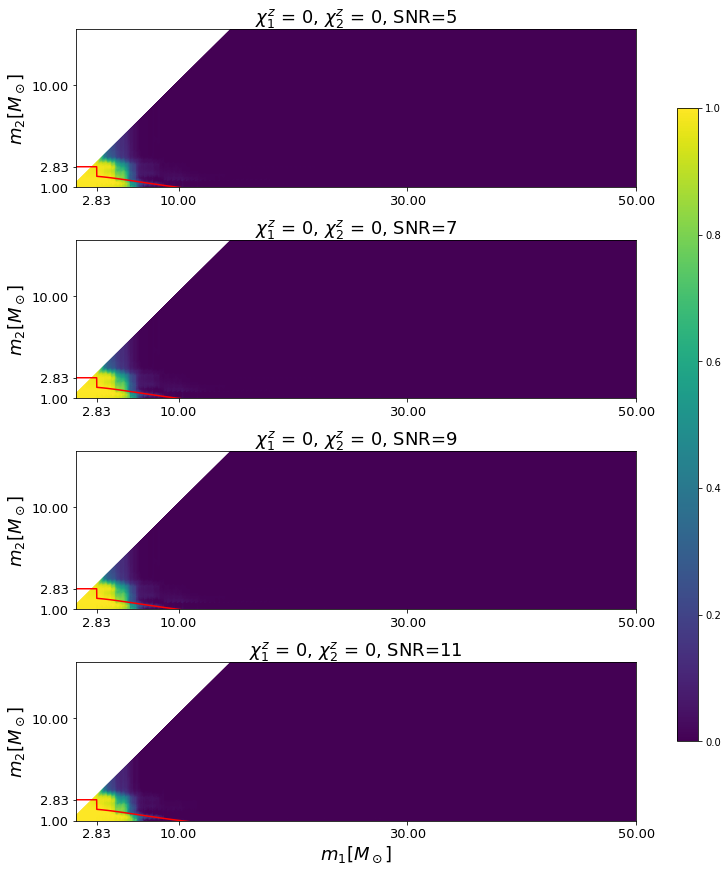

In [66]:
RF.save_plots=True
probLabelDensePlot(RF,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'REM',"3cat_fig4rem")
probLabelDensePlot(RF,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'REM',"3cat_fig6rem")
RF.save_plots=False

## Histograms (fig5)

In [87]:
plt.rcParams["font.size"]=14

In [72]:
def hist_prob_NS(algo, xlabel, legendyes, legendno, figname):
    probs=algo.model.predict_proba(algo.data_test)
    pred=probs[:,1]+probs[:,2]
    truelabel=algo.labels_test
    index_events_has=(np.where((truelabel == 1) | (truelabel == 2)))
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where(truelabel==0)
    p_events_nohas=pred[index_events_nohas]
    
    plt.hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label=legendno)
    plt.hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label=legendyes)
    plt.yscale('log')
    plt.yticks([1e2,1e3,1e4,1e5])
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylim([4.5e1,1.9e5])
    plt.xlabel(xlabel)
    plt.axvline(x=0.5,color='black',ls='--')
    plt.grid(ls='--')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    
    return

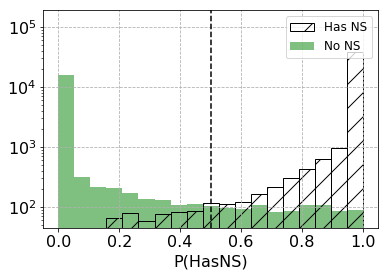

In [74]:
RF.save_plots=True
hist_prob_NS(RF, 'P(HasNS)', 'Has NS', 'No NS', '3cat_histNS')
RF.save_plots=False

In [76]:
def hist_prob_REM(algo, xlabel, legendyes, legendno, figname):
    probs=algo.model.predict_proba(algo.data_test)
    pred=probs[:,2]
    truelabel=algo.labels_test
    index_events_has=np.where(truelabel == 2)
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where((truelabel==0) | (truelabel==1))
    p_events_nohas=pred[index_events_nohas]
    
    plt.hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label=legendno)
    plt.hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label=legendyes)
    plt.yscale('log')
    plt.yticks([1e2,1e3,1e4,1e5])
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylim([4.5e1,1.9e5])
    plt.xlabel(xlabel)
    plt.axvline(x=0.5,color='black',ls='--')
    plt.grid(ls='--')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    
    return

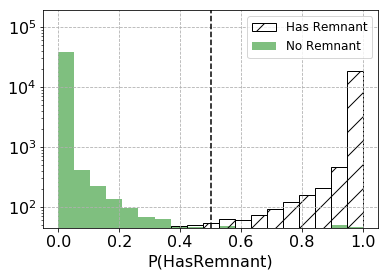

In [79]:
RF.save_plots=True; 
hist_prob_REM(RF, 'P(HasRemnant)', 'Has Remnant', 'No Remnant', '3cat_histREM')
RF.save_plots=False

## ROC curve (fig5)

In [85]:
events_have_NS=np.where((RF.labels_test==1) | (RF.labels_test==2))[0]
print(events_have_NS)


[    0     1     3 ... 59995 59997 59998]


In [86]:
te=[0,1,2]
for t in te:
    if t in events_have_NS:
        print("sip")

sip
sip


In [91]:
def ROC_hasNS(algo,figname):
    allprob = algo.model.predict_proba(algo.data_test)
    v_prob_NS = allprob[:,1] + allprob[:,2]
    events_have_NS = np.where((RF.labels_test==1) | (RF.labels_test==2))[0]
    N = len(events_have_NS)
    M = len(algo.labels_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_NS>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_NS:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        i = i + 1
    
    plt.figure()
    sc=plt.scatter(FP, TP, c=threshold, cmap='viridis')
    plt.colorbar(sc, label="Threshold")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    if algo.save_plots:
        plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return
    

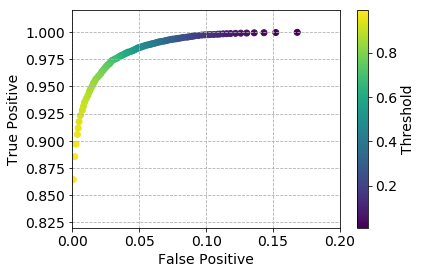

In [93]:
RF.save_plots = True
ROC_hasNS(RF,"3cat_rocNS")

In [94]:
def ROC_hasREM(algo,figname):
    allprob = algo.model.predict_proba(algo.data_test)
    v_prob_REM = allprob[:,2]
    events_have_REM = np.where(RF.labels_test==2)[0]
    N = len(events_have_REM)
    M = len(algo.labels_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_REM>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_REM:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        i = i + 1
    
    plt.figure()
    sc=plt.scatter(FP, TP, c=threshold, cmap='viridis')
    plt.colorbar(sc, label="Threshold")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    if algo.save_plots:
        plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return

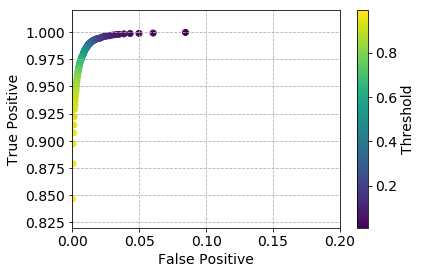

In [96]:
RF.save_plots = True
ROC_hasREM(RF,"3cat_rocREM")
RF.save_plotsots = False

## Histogram and ROC curve together

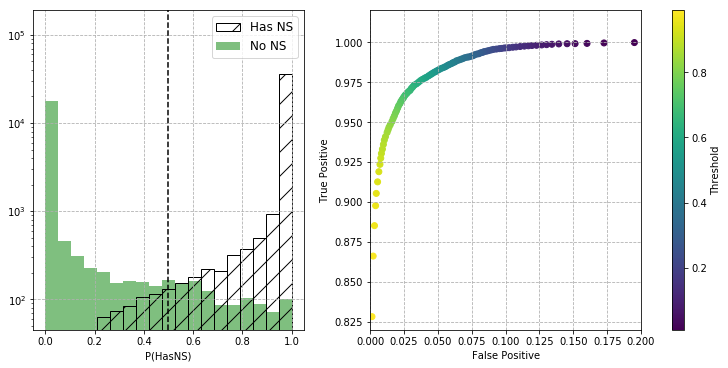

In [103]:
RF.save_plots=True
hist_ROC_NS(RF, 'P(HasNS)', 'Has NS', 'No NS', '3cat_histNS')
#RF.save_plots=False

## Mass distribution data (fig1)

## Real observations
event_id,grace_id,m1_rec,m2_rec,chi1_rec,chi2_rec,snr,GWTC

In [4]:
import csv
def extractDataWithStrings(filename, verbose=False):
    """ Reads data from csv file and returns it in array form.
    """
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    return lst

In [5]:
data=extractDataWithStrings(pathClassy+'real_data.csv')
data=np.asarray(data)
data=np.array(data[:,2:-1], dtype=float)

In [6]:
EOS = ["APR4_EPP", "BHF_BBB2", "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1_PP", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLy", "SLY2", "SLY9", "SLY230A"]


In [7]:
lRF = []; probNS=[]; probREM=[]
for eos in EOS:
    RF = classyRF.ClassificationRF()
    RF.loadModel(pathClassy, eos)
    RF.data_test = data
    prob = RF.model.predict_proba(data)
    probns=prob[:,1]+prob[:,2]
    probrem=prob[:,2]
    probNS.append(probns)
    probREM.append(probrem)
    lRF.append(RF)


loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\APR4_EPP.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\BHF_BBB2.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\H4.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\HQC18.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\KDE0V.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\KDE0V1.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\MPA1.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\MS1_PP.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\MS1B_PP.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\RS.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\SK255.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\SK272.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\SKI2.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\SKI3.joblib
loadi

In [9]:
weights=[1.526, 1.555, 0.056, 1.422, 1.177, 1.283, 0.276, 0.001, 0.009, 0.176, 0.179, 0.159, 0.108, 0.107, 0.33, 0.025, 0.288, 0.29, 0.618, 1.0, 1.028, 0.37, 0.932]

In [ ]:
dem = sum(weights)

In [29]:
weighted=[]
print("Predictions real data p(HasNS)")
for i in range(len(weights)):
    weighted.append(weights[i]*probNS[i])
for k in range(0,len(probNS[0])):
    suma = 0
    for i in range(len(probNS)):
        suma = suma + weighted[i][k]
    suma = suma/dem
    print("{:.3f}".format(suma))

Predictions real data p(HasNS)
0.000
1.000
0.001
0.001
0.000
0.000
0.000
0.000
0.000
1.000
0.996
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.005
0.000
0.000
0.003
0.009
0.001
0.116
0.000
0.001
0.000
0.045
0.002
0.000
0.002
0.001
0.000
0.001
0.000
0.003
1.000
0.000
0.000
0.011
0.000
0.000
0.000
0.002
0.002


In [30]:
weighted=[]
print("Predictions real data p(HasREM)")
for i in range(len(weights)):
    weighted.append(weights[i]*probREM[i])
for k in range(0,len(probNS[0])):
    suma = 0
    for i in range(len(probNS)):
        suma = suma + weighted[i][k]
    suma = suma/dem
    print("{:.3f}".format(suma))

Predictions real data p(HasREM)
0.000
1.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.999
0.009
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.002
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000


2.059620596205962e-05
1.0
0.0006059620596205961
0.0009853658536585364
0.0
0.0
0.0
0.00039070847851335657
0.0
1.0
0.9963798683701122
0.00022702284165698798
2.4622531939605112e-05
0.0
0.0
0.0001551684088269454
0.0
0.0001551684088269454
0.0
0.004856368563685636
0.00019945799457994577
4.305071622144793e-05
0.002659233449477352
0.009457530003871466
0.0005276035617499032
0.11616229190863335
3.097173828881146e-06
0.0005833526906697638
0.0004384049554781262
0.044771506000774286
0.0016610143244289585
5.29616724738676e-05
0.0017073170731707315
0.0006960898180410374
0.00045729771583430124
0.0006871080139372822
4.305071622144793e-05
0.0029506775067750677
0.9998389469608984
0.000408052651955091
0.00022531939605110337
0.010538753387533873
0.0003021293070073558
0.00023631436314363143
0.00024281842818428182
0.0015075493612078977
0.0022583042973286873


In [100]:
pred=RF.compute_prediction(data)
print(pred)

[0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [101]:
prob=RF.model.predict_proba(data)
probNS=prob[:,1]+prob[:,2]
probREM=prob[:,2]

In [102]:
for k in range(0,len(probNS)):
    print(probNS[k])

0.002
1.0
0.006
0.0
0.0
0.0
0.0
0.002
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.002
0.0
0.0
0.002
0.0
0.01
0.02
0.0
0.734
0.002
0.0
0.0
0.29
0.01
0.0
0.08
0.002
0.0
0.022
0.0
0.0
1.0
0.0
0.0
0.01
0.006
0.0
0.0
0.004
0.006


In [103]:
for k in range(0,len(probREM)):
    print(probREM[k])

0.002
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.236
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.052
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


## Checking numbers with SNR

In [15]:
print(RF.model.predict_proba(np.array([2.5,2,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([2.5,2,0,0,20]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([10,6,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([10,6,0,0,20]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([42,2.7,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([42,2.7,0,0,20]).reshape(1, -1)))

[[0. 0. 1.]]
[[0.    0.002 0.998]]
[[0.562 0.438 0.   ]]
[[0.76 0.24 0.  ]]
[[0.204 0.796 0.   ]]
[[0.22  0.778 0.002]]


In [16]:
print(RF.model.predict_proba(np.array([2.5,2,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([2.5,2,0,0,20]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([3.4,2.83,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([3.4,2.83,0,0,20]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([8,1.1,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([8,1.1,0,0,20]).reshape(1, -1)))

[[0. 0. 1.]]
[[0.    0.002 0.998]]
[[0.002 0.02  0.978]]
[[0.004 0.068 0.928]]
[[0.    0.978 0.022]]
[[0.    0.988 0.012]]


In [11]:
EOS = ["APR4_EPP", "BHF_BBB2", "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1_PP", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLy", "SLY2", "SLY9", "SLY230A"]

for eos in EOS:
    RF = RF = classyRF.ClassificationRF()
    RF.loadModel(pathTrees, eos)

    depths = [tree.tree_.max_depth for tree in RF.model.estimators_]
    print("------")
    print(f"Mean tree depth in the Random Forest: {np.round(np.mean(depths))}")
    print("max tree depth", np.max(depths))
    print("min tree depth",np.min(depths))

loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\500trees\APR4_EPP.joblib
------
Mean tree depth in the Random Forest: 35.0
max tree depth 46
min tree depth 29
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\500trees\BHF_BBB2.joblib
------
Mean tree depth in the Random Forest: 35.0
max tree depth 47
min tree depth 28
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\500trees\H4.joblib
------
Mean tree depth in the Random Forest: 35.0
max tree depth 48
min tree depth 29
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\500trees\HQC18.joblib
------
Mean tree depth in the Random Forest: 35.0
max tree depth 49
min tree depth 29
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\500trees\KDE0V.joblib
------
Mean tree depth in the Random Forest: 36.0
max tree depth 53
min tree depth 28
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\500trees\KDE0V1.joblib
------
Mean tree depth in the Random Forest: 35.0
max tree depth 50
min tree depth 29
